# Name - Kheshini BUDHNA (909662)


#  1. Importing libraries and creating object for metrics

In [196]:
# Importing necessary libraries for data manipulation and visualization
import pandas as pd   # For data manipulation
import numpy as np     # For numerical operations
import matplotlib.pyplot as plt  # For basic visualizations
import seaborn as sns  # For statistical data visualization

import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='seaborn')


In [197]:
#importing libraries for scaling, training and testing.
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier


#model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, accuracy_score

In [198]:
class Metrics:
    def __init__(self, accuracy, precision, recall, f1):
        self.accuracy = accuracy
        self.precision = precision
        self.recall = recall
        self.f1 = f1

    def __repr__(self):
        return (f"Metrics(Accuracy={self.accuracy}, Precision={self.precision}, "
                f"Recall={self.recall}, F1-score={self.f1})")

    @staticmethod
    def calc_metrics(y_true, y_pred):
        # Calculate metrics
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)

        # Create and return a Metrics object
        return Metrics(accuracy, precision, recall, f1)


In [199]:
import numpy as np
import matplotlib.pyplot as plt

def plot_metrics(metrics_list, labels=None, title='Comparison of Metrics'):
    """
    Plot Accuracy, Precision, Recall, and F1-score metrics for multiple models.

    Parameters:
    metrics_list (list): A list of Metrics objects.
    labels (list): Optional labels for each model.
    title (str): Title of the plot.
    """
    if labels is None:
        labels = [f'Model {i+1}' for i in range(len(metrics_list))]

    # Extracting values for plotting
    num_metrics = len(metrics_list)
    labels_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']

    # Prepare a list to store metric values
    values = np.array([[m.accuracy, m.precision, m.recall, m.f1] for m in metrics_list])

    y = np.arange(len(labels_names))  # the label locations
    width = 0.15  # the width of the bars

    # Set figure size based on the number of models
    fig_size = (10, 8) if num_metrics == 1 else (13, 10)
    fig, ax = plt.subplots(figsize=fig_size)  # Set the figure size

    # Plot each set of metrics
    for i in range(num_metrics):
        ax.barh(y + (i - num_metrics / 2) * width, values[i], width, label=labels[i])

    # Add some text for labels, title and custom y-axis tick labels, etc.
    ax.set_xlabel('Values')
    ax.set_title(title)
    ax.set_yticks(y)
    ax.set_yticklabels(labels_names)
    ax.legend()

    # Adding value annotations on the bars
    def add_value_annotations():
        for i, bar in enumerate(ax.patches):
            width = bar.get_width()
            ax.annotate(f'{width:.3f}',  # Format to 3 decimal places
                        xy=(width, bar.get_y() + bar.get_height() / 2),
                        xytext=(3, 0),  # 3 points horizontal offset
                        textcoords="offset points",
                        ha='left', va='center')  # Align annotations to the left

    add_value_annotations()

    # Show the plot
    plt.tight_layout()
    plt.show()


# 2. Loading dataset.

In [200]:
df = pd.read_csv("train.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [201]:
# Define the data as a dictionary
train_Cols = {
    "ssc_p": "Secondary Education percentage",
    "ssc_b": "Secondary Education board (Central or Others)",
    "hsc_p": "Higher Secondary Education percentage",
    "hsc_b": "Higher Secondary board (Central or Others)",
    "hsc_s": "Higher Secondary specialization (Commerce, Science, Arts)",
    "degree_p": "Degree percentage",
    "degree_t": "Degree type (Sci&Tech, Comm&Mgmt)",
    "workex": "Work experience (Yes/No)",
    "etest_p": "E-test percentage",
    "specialisation": "MBA specialization (Mkt&HR, Mkt&Fin)",
    "mba_p": "MBA percentage",
    "status": "Placement status (Placed, Not Placed)",
    "salary": "Salary offered (only for Placed students)"
}

# Print each item in a list format
for column, description in train_Cols.items():
    print(f"{column}: {description}")


ssc_p: Secondary Education percentage
ssc_b: Secondary Education board (Central or Others)
hsc_p: Higher Secondary Education percentage
hsc_b: Higher Secondary board (Central or Others)
hsc_s: Higher Secondary specialization (Commerce, Science, Arts)
degree_p: Degree percentage
degree_t: Degree type (Sci&Tech, Comm&Mgmt)
workex: Work experience (Yes/No)
etest_p: E-test percentage
specialisation: MBA specialization (Mkt&HR, Mkt&Fin)
mba_p: MBA percentage
status: Placement status (Placed, Not Placed)
salary: Salary offered (only for Placed students)


# 3. Data preprocessing.

## 3.1 Data shape and structure (to identify further data cleaning steps)


In [202]:
# Find the number of rows and columns
rows, columns = df.shape
print(f"Rows: {rows}, Columns: {columns}")


Rows: 215, Columns: 15


In [203]:
# Get summary information about the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


In [204]:
#showing the list of missing values
df.isna().sum()

,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


In [205]:
# descriptive statistics
df.describe()

,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,0.353488,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,0.479168,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,0.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,0.000000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,0.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,1.000000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,1.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


## 3.2 Deleting the 'salary' Column to address missing values.

***Salary column has missing values, and that needs to be addressed or dropped. In this case, as the target variable is status, the salary column will be dropped as it is an extension to the target variable and not an input needed to find the target variable.***


In [206]:
df = df.drop('salary', axis=1)

In [207]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


# 3.3. Data visualisation.

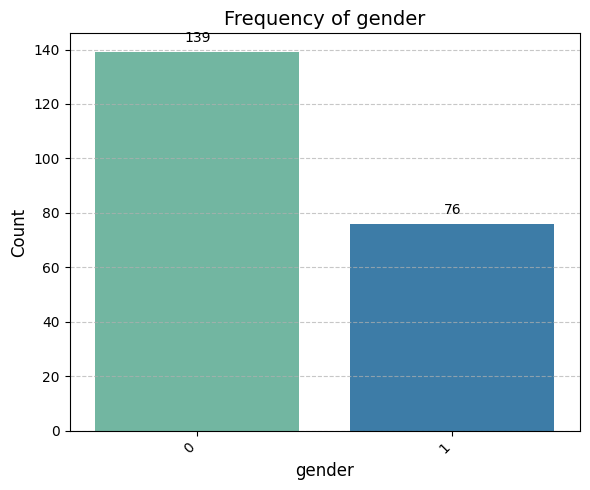

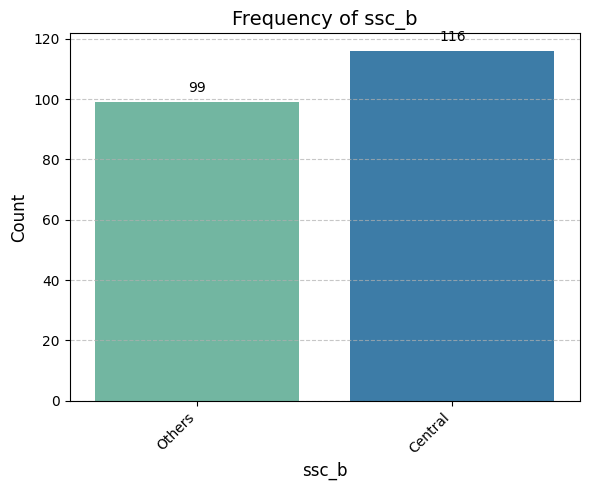

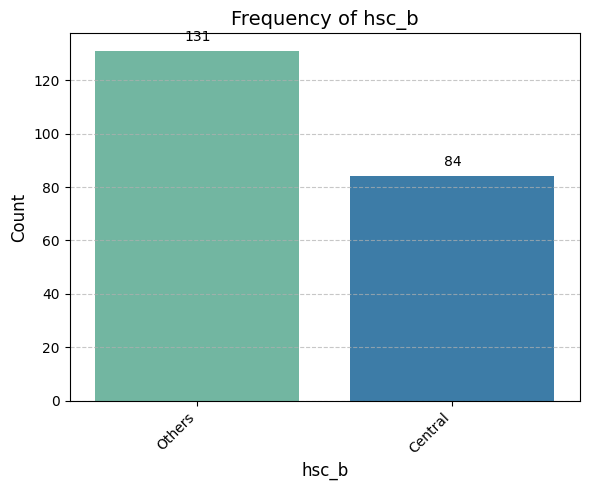

<ipython-input-208-df834190bc5c>:10: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(data=df, x=feature, hue=feature, palette=palette, dodge=False, legend=False)  # Assign hue and remove legend


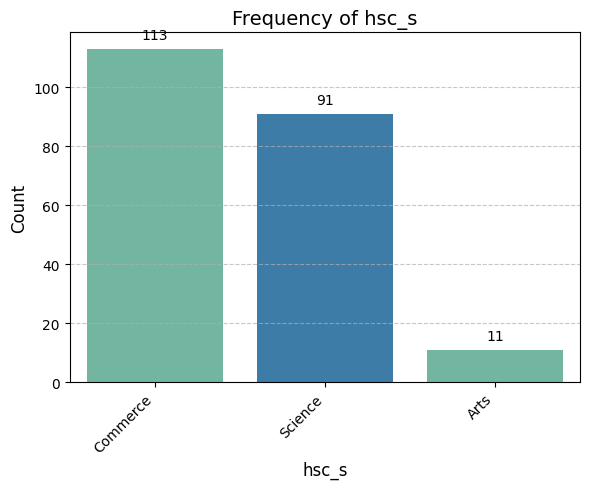

<ipython-input-208-df834190bc5c>:10: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(data=df, x=feature, hue=feature, palette=palette, dodge=False, legend=False)  # Assign hue and remove legend


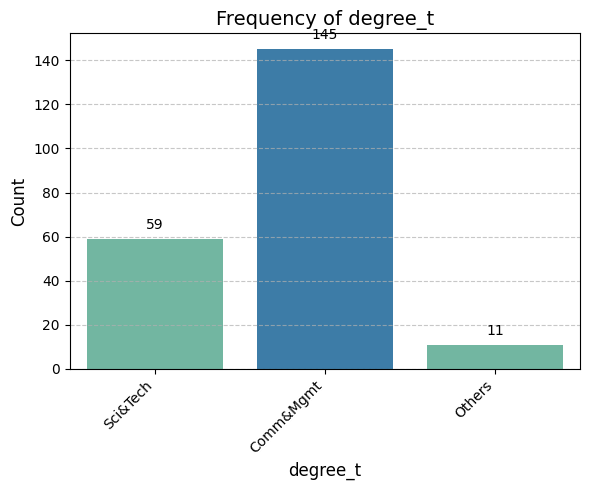

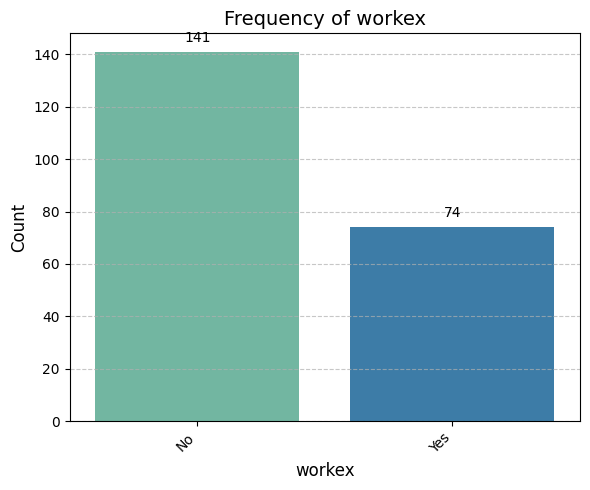

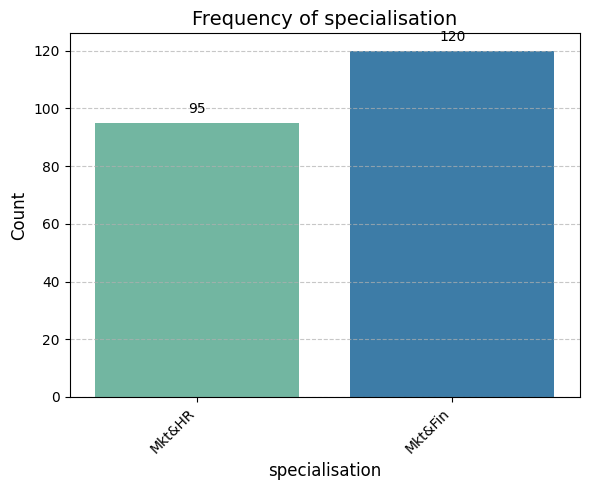

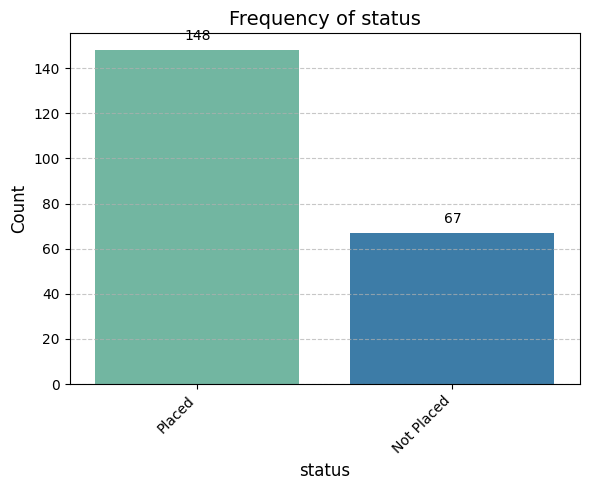

In [208]:
# Define categorical variables to analyze
categorical_features = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']

# Set up the color palette to use two shades of turquoise
palette = sns.color_palette(['#66c2a5', '#2c7fb8'])

# Create count plots for each categorical variable to visualize the frequency distribution
for feature in categorical_features:
    plt.figure(figsize=(6, 5))  # Set the figure size for each plot
    ax = sns.countplot(data=df, x=feature, hue=feature, palette=palette, dodge=False, legend=False)  # Assign hue and remove legend
    plt.title(f'Frequency of {feature}', fontsize=14)  # Add title with a larger font size
    plt.xlabel(feature, fontsize=12)  # Label the x-axis with the feature name and adjust font size
    plt.ylabel('Count', fontsize=12)  # Label the y-axis as 'Count' with adjusted font size
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability if needed
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines with a lighter style

    # Add count annotations on top of each bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',  # Convert count to integer
                    (p.get_x() + p.get_width() / 2, p.get_height()),  # Set position on top of bar
                    ha='center', va='bottom',  # Center-align horizontally
                    xytext=(0, 5),  # Slight offset above the bar
                    textcoords='offset points', fontsize=10, color='black')  # Annotation style

    plt.tight_layout()  # Ensure the layout fits well
    plt.show()  # Display the plot


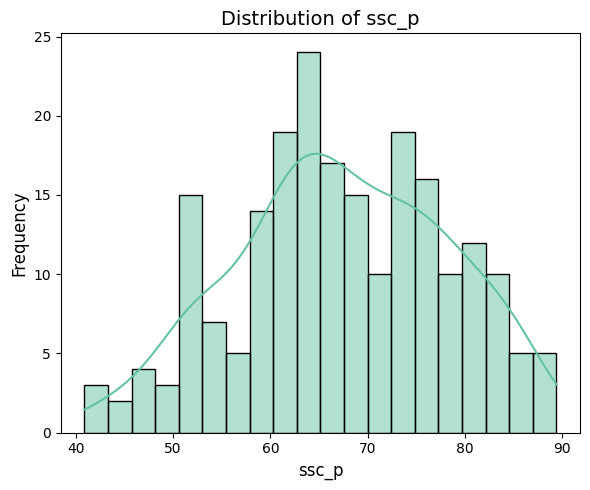

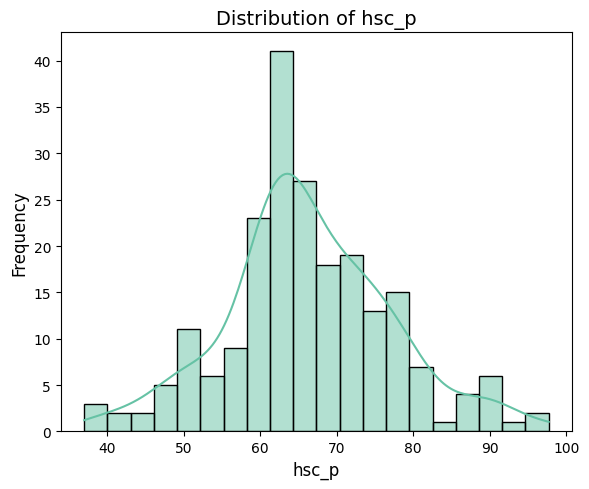

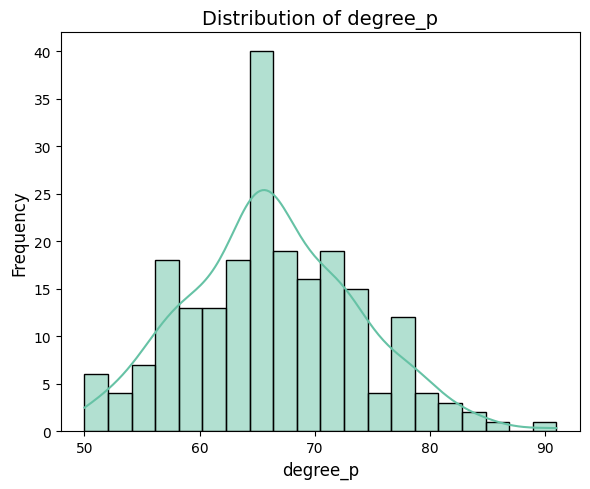

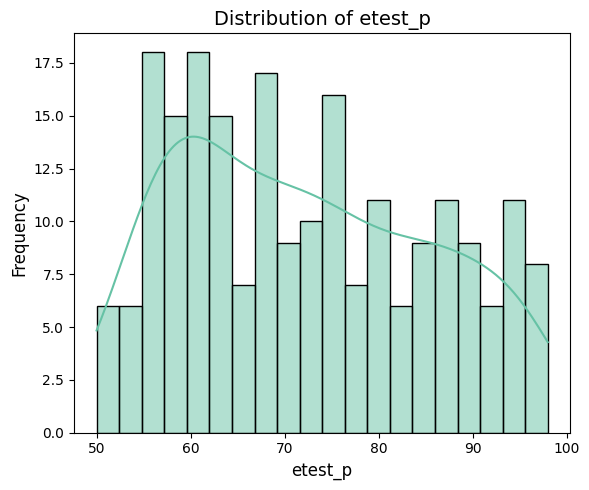

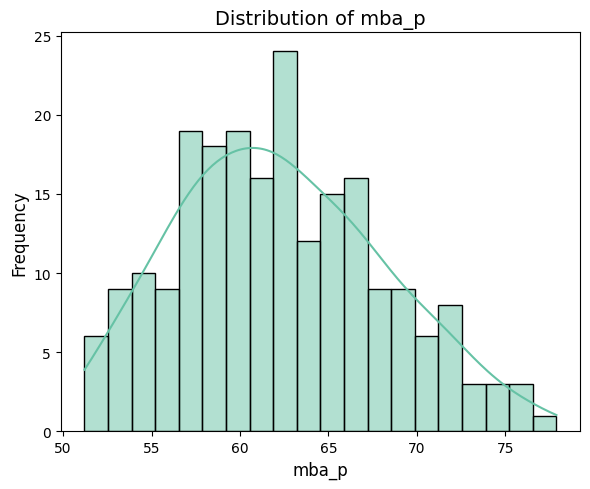

In [209]:
# List of numerical features to analyze
numerical_columns = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']

# Set the color palette for the histograms
palette = sns.color_palette(['#66c2a5', '#2c7fb8'])

# Create histograms for each numerical feature with Kernel Density Estimate (KDE)
for column in numerical_columns:
    plt.figure(figsize=(6, 5))  # Adjusting figure size
    sns.histplot(df[column], kde=True, color=palette[0], bins=20)  # Customize bins and apply the first turquoise color
    plt.title(f'Distribution of {column}', fontsize=14)  # Add title with larger font
    plt.xlabel(column, fontsize=12)  # Label the x-axis with feature name
    plt.ylabel('Frequency', fontsize=12)  # Label the y-axis as 'Frequency'
    plt.tight_layout()  # Ensure layout is adjusted properly
    plt.show()  # Display the plot


## 3.3 Train-test split (70-30 ratio)

In [210]:
# Split data into features (X) and target (y)
X = df.drop('status', axis=1)
y = df['status']

# Split into training and test sets (30% test, 70% train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## 3.4. Encoding the Categorical Columns (categorical data to numerical data)



In [211]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode in the features (X)
columns_to_encode = ['ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']

# Initialize an empty dictionary to store mappings
label_mappings = {}

# Apply LabelEncoder and store mappings for feature columns
for column in columns_to_encode:
    le = LabelEncoder()
    # Fit the encoder on the training data and transform it
    X_train[column] = le.fit_transform(X_train[column])
    # Apply the same transformation to the test data
    X_test[column] = le.transform(X_test[column])  # Use transform only, not fit

    # Store the mapping for each column
    label_mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))

# Encode the target variable 'status' separately
le_status = LabelEncoder()
y_train = le_status.fit_transform(y_train)  # Fit and transform on training set
y_test = le_status.transform(y_test)        # Transform test set using the same encoder

# Store the mapping for 'status'
label_mappings['status'] = dict(zip(le_status.classes_, le_status.transform(le_status.classes_)))

# Print mappings for each column
for column, mapping in label_mappings.items():
    print(f"{column} - {mapping}")


ssc_b - {'Central': 0, 'Others': 1}
hsc_b - {'Central': 0, 'Others': 1}
hsc_s - {'Arts': 0, 'Commerce': 1, 'Science': 2}
degree_t - {'Comm&Mgmt': 0, 'Others': 1, 'Sci&Tech': 2}
workex - {'No': 0, 'Yes': 1}
specialisation - {'Mkt&Fin': 0, 'Mkt&HR': 1}
status - {'Not Placed': 0, 'Placed': 1}


## 3.5. Class ratios.

In [212]:
# Count occurrences of each class in the 'status' column
status_counts = df['status'].value_counts()
status_proportion = df['status'].value_counts(normalize=True) * 100  # Convert to percentage

# Display counts and proportions
print("Class Counts:\n", status_counts)
print("\nClass Proportions (%):\n", status_proportion)

Class Counts:
 status
Placed        148
Not Placed     67
Name: count, dtype: int64

Class Proportions (%):
 status
Placed        68.837209
Not Placed    31.162791
Name: proportion, dtype: float64


## 3.6. Applying SMOTE to deal with class imbalance.

In [213]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Convert y_train and y_train_smote back to pandas Series for value_counts
y_train_series = pd.Series(y_train)
y_train_smote_series = pd.Series(y_train_smote)

# Verify the class distribution before and after applying SMOTE
print(f"Class distribution before SMOTE: \n{y_train_series.value_counts()}")
print(f"Class distribution after SMOTE: \n{y_train_smote_series.value_counts()}")

Class distribution before SMOTE: 
1    104
0     46
Name: count, dtype: int64
Class distribution after SMOTE: 
0    104
1    104
Name: count, dtype: int64


## 3.7. Standardization of columns with integers and floats.

In [214]:
# Identify the numerical columns (you can specify them manually or select them automatically)
numerical_columns = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the numerical columns in the training data
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Model Selection:

For predicting the categorical target "status" (with values "Placed" and "Not Placed"), the following three models would be the best choices based on their performance and ability to handle both categorical and numerical features:

1. Random Forest Classifier
Reason: Random Forest is an ensemble model that uses multiple decision trees to improve accuracy. It performs well on both numerical and categorical data, handles complex relationships, and is less prone to overfitting than a single decision tree.
Strengths:
Robust to overfitting.
Can handle mixed data types (numerical and categorical).
Provides feature importance, which can help in understanding the model.
Use Case: Ideal for high accuracy and stability across different datasets.
2. Gradient Boosting Machines (GBM) / XGBoost
Reason: Gradient Boosting is a powerful ensemble method that builds decision trees sequentially. XGBoost (an optimized version of gradient boosting) often performs exceptionally well in classification tasks, especially when the data has complex patterns.
Strengths:
Often provides top-tier performance on structured data.
Can model complex relationships between features.
Highly effective in imbalanced datasets (if your data is imbalanced).
Use Case: Ideal for achieving high predictive performance, particularly if accuracy is a key factor.
3. Logistic Regression
Reason: Logistic Regression is a simple, yet effective, linear model for binary classification tasks. It works well when the data has a linear decision boundary or when you need a fast, interpretable model.
Strengths:
Simple and interpretable.
Good baseline model to compare against more complex models.
Works well when the relationship between features and the target variable is approximately linear.
Use Case: Great for a quick, interpretable model and as a baseline comparison to more complex models.
Summary:
Random Forest Classifier is a strong all-rounder for classification tasks with categorical and numerical data.
Gradient Boosting (XGBoost) will likely provide the highest performance, particularly for more complex datasets.
Logistic Regression is a simpler, interpretable model that serves as a good baseline and works well for linearly separable data.
These three models will cover both complex and simpler approaches, giving you a good range of options for predicting the "status" variable effectively.

# Random forest classifier


In [215]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Initializing the Random Forest Classifier
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [40, 50, 100, 200],        # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],         # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 5],           # Minimum samples required to be at a leaf node
    'criterion': ['gini', 'entropy']
    }

# Performing Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Getting the best parameters from GridSearch
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Evaluating the model with the best parameters
best_rf_model = grid_search.best_estimator_

# Predicting on the test set
y_pred_rf = best_rf_model.predict(X_test)

# Performance metrics
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
rf_metrics = Metrics.calc_metrics(y_test, y_pred_rf)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 40}
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.52      0.61        21
           1       0.80      0.91      0.85        44

    accuracy                           0.78        65
   macro avg       0.77      0.72      0.73        65
weighted avg       0.78      0.78      0.77        65

Accuracy: 0.7846153846153846
Precision: 0.8
Recall: 0.9090909090909091
F1-score: 0.851063829787234


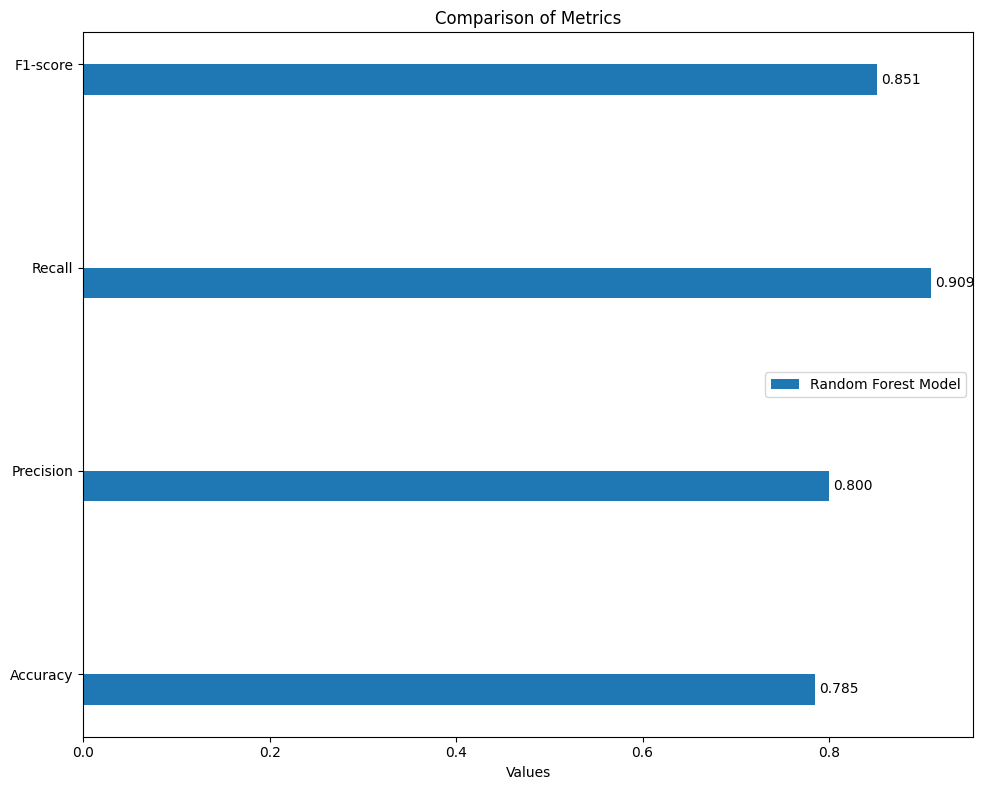

In [216]:
plot_metrics([rf_metrics], labels=['Random Forest Model'])

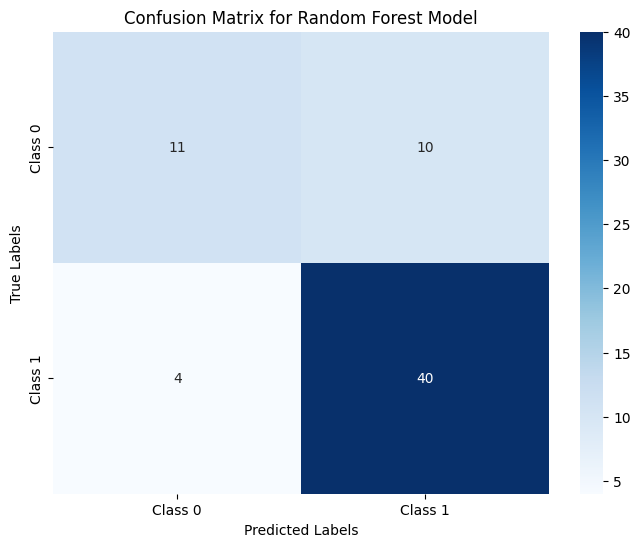

In [217]:
# Generate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Model 2 - XGBoost

In [218]:
# Initializing the XGBoost model
xg_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],              # Number of boosting rounds
    'max_depth': [3, 5, 7, 10],                   # Maximum depth of a tree
    'learning_rate': [0.01, 0.1, 0.2],            # Learning rate (shrinkage)
    'subsample': [0.8, 0.9, 1.0],                  # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 0.9, 1.0],          # Subsample ratio of columns for each tree
    'gamma': [0, 0.1, 0.2],                       # Minimum loss reduction required to make a further partition
    'min_child_weight': [1, 3, 5]                  # Minimum sum of instance weight (hessian) needed in a child
}

# Performing Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=xg_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Getting the best parameters from GridSearch
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Evaluating the model with the best parameters
best_xg_model = grid_search.best_estimator_

# Predicting on the test set
y_pred_xg = best_xg_model.predict(X_test)

# Performance metrics
print("Classification Report:\n", classification_report(y_test, y_pred_xg))
xg_metrics = Metrics.calc_metrics(y_test, y_pred_xg)
print("Accuracy:", accuracy_score(y_test, y_pred_xg))
print("Precision:", precision_score(y_test, y_pred_xg))
print("Recall:", recall_score(y_test, y_pred_xg))
print("F1-score:", f1_score(y_test, y_pred_xg))

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 50, 'subsample': 0.8}
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.62      0.68        21
           1       0.83      0.91      0.87        44

    accuracy                           0.82        65
   macro avg       0.80      0.76      0.78        65
weighted avg       0.81      0.82      0.81        65

Accuracy: 0.8153846153846154
Precision: 0.8333333333333334
Recall: 0.9090909090909091
F1-score: 0.8695652173913043


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:43:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


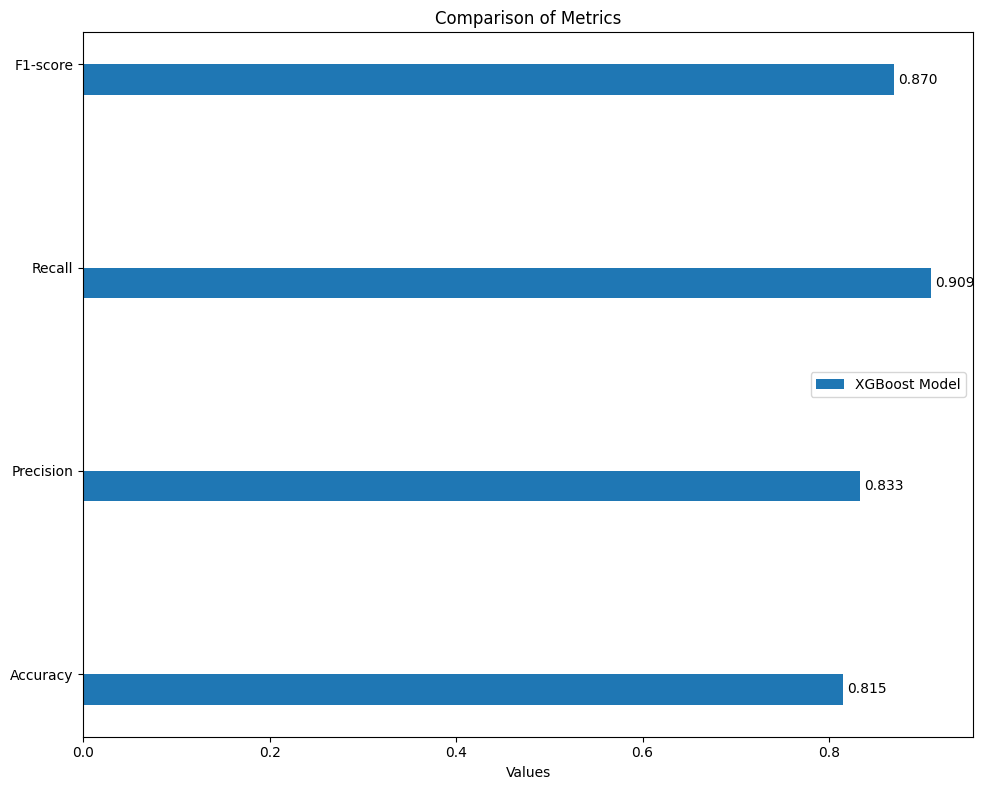

In [219]:
plot_metrics([xg_metrics], labels=['XGBoost Model'])

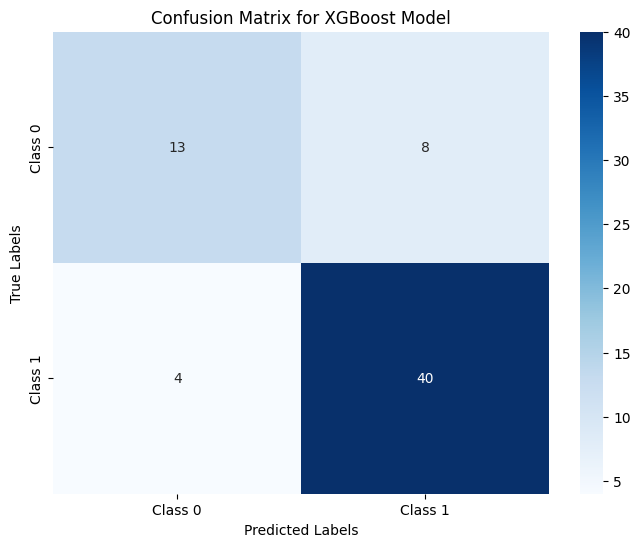

In [220]:
# Generate confusion matrix for XGBoost
conf_matrix_xg = confusion_matrix(y_test, y_pred_xg)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xg, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for XGBoost Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Model 3: Logistic regression

In [221]:
# Initializing the Logistic Regression Model
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],           # Regularization type
    'C': [0.01, 0.1, 1, 10],           # Regularization strength
    'solver': ['liblinear', 'saga'],   # Solver to use for optimization
    'max_iter': [100, 200, 300]        # Maximum number of iterations for optimization
}

# Performing Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Getting the best parameters from GridSearch
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Evaluating the model with the best parameters
best_lr_model = grid_search.best_estimator_

# Predicting on the test set
y_pred_lr = best_lr_model.predict(X_test)

# Performance metrics
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
lr_metrics = Metrics.calc_metrics(y_test, y_pred_lr)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.57      0.65        21
           1       0.82      0.91      0.86        44

    accuracy                           0.80        65
   macro avg       0.78      0.74      0.75        65
weighted avg       0.79      0.80      0.79        65

Accuracy: 0.8
Precision: 0.8163265306122449
Recall: 0.9090909090909091
F1-score: 0.8602150537634409


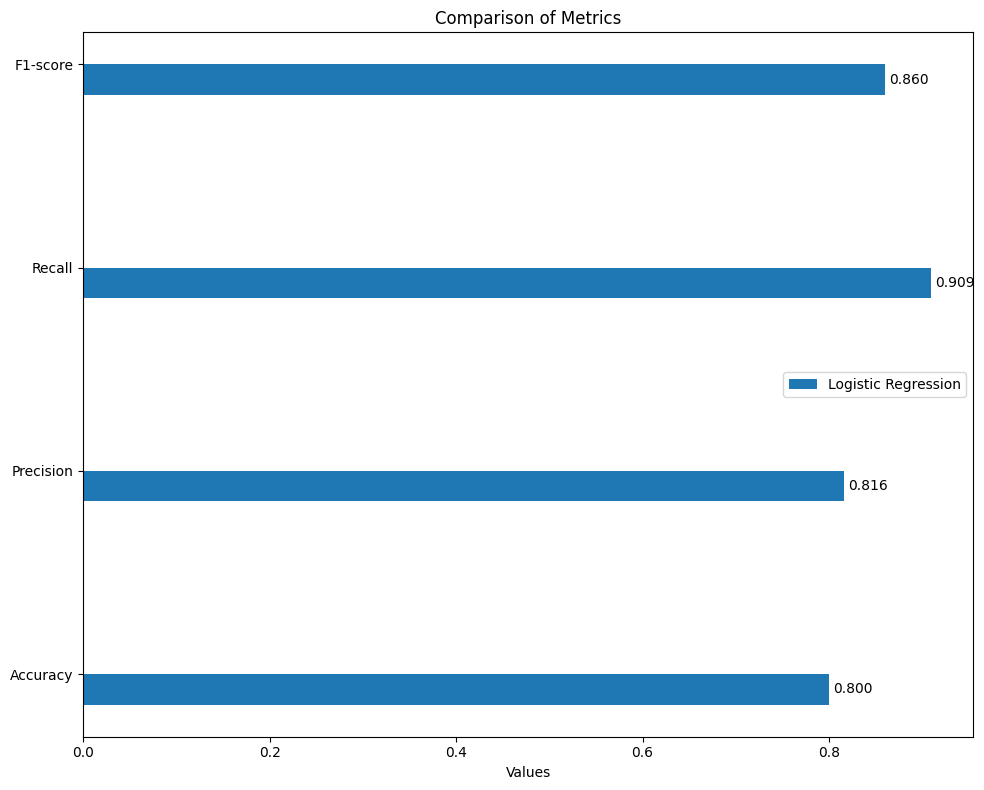

In [222]:
plot_metrics([lr_metrics], labels=['Logistic Regression'])

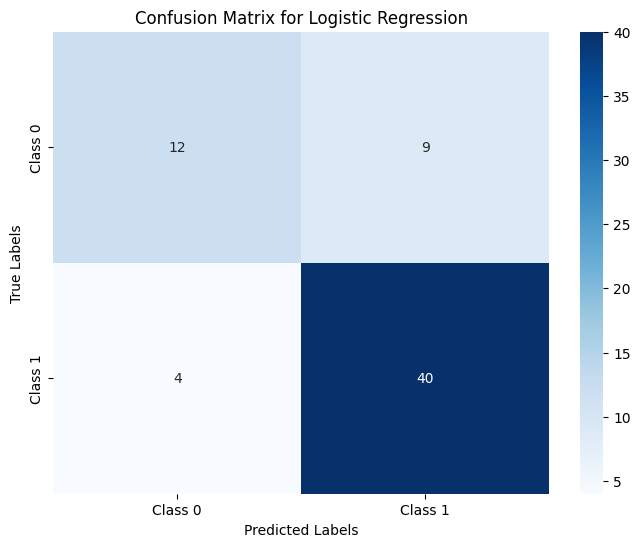

In [223]:
# Generate confusion matrix for XGBoost
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [224]:
# Create and train the Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr',  best_lr_model),
    ('xg', best_xg_model),
    ('rf', best_rf_model)
], voting='hard')

voting_clf.fit(X_train, y_train)

# Make predictions with the Voting Classifier
y_pred_voting = voting_clf.predict(X_test)

# Calculate metrics for the Voting Classifier
voting_metrics = Metrics.calc_metrics(y_test, y_pred_voting)

# Performance metrics
print("Classification Report:\n", classification_report(y_test, y_pred_voting))
print("Accuracy:", accuracy_score(y_test, y_pred_voting))
print("Precision:", precision_score(y_test, y_pred_voting))
print("Recall:", recall_score(y_test, y_pred_voting))
print("F1-score:", f1_score(y_test, y_pred_voting))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:43:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.57      0.65        21
           1       0.82      0.91      0.86        44

    accuracy                           0.80        65
   macro avg       0.78      0.74      0.75        65
weighted avg       0.79      0.80      0.79        65

Accuracy: 0.8
Precision: 0.8163265306122449
Recall: 0.9090909090909091
F1-score: 0.8602150537634409


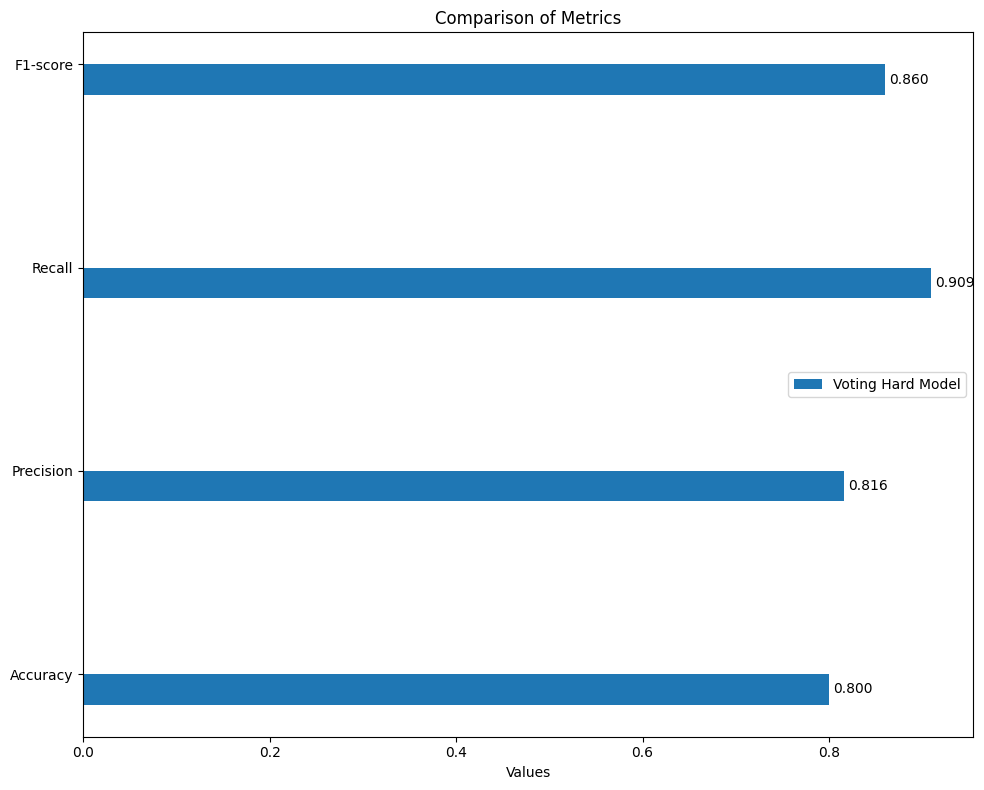

In [225]:
plot_metrics([voting_metrics], labels=['Voting Hard Model'])

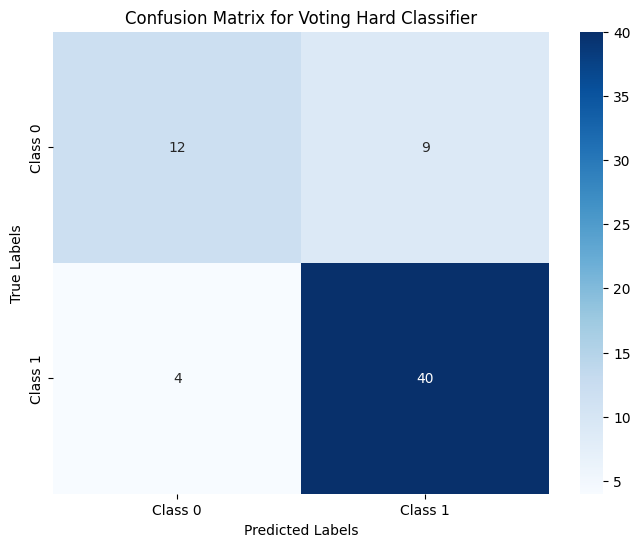

In [226]:
# Generate confusion matrix for XGBoost
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_voting, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for Voting Hard Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

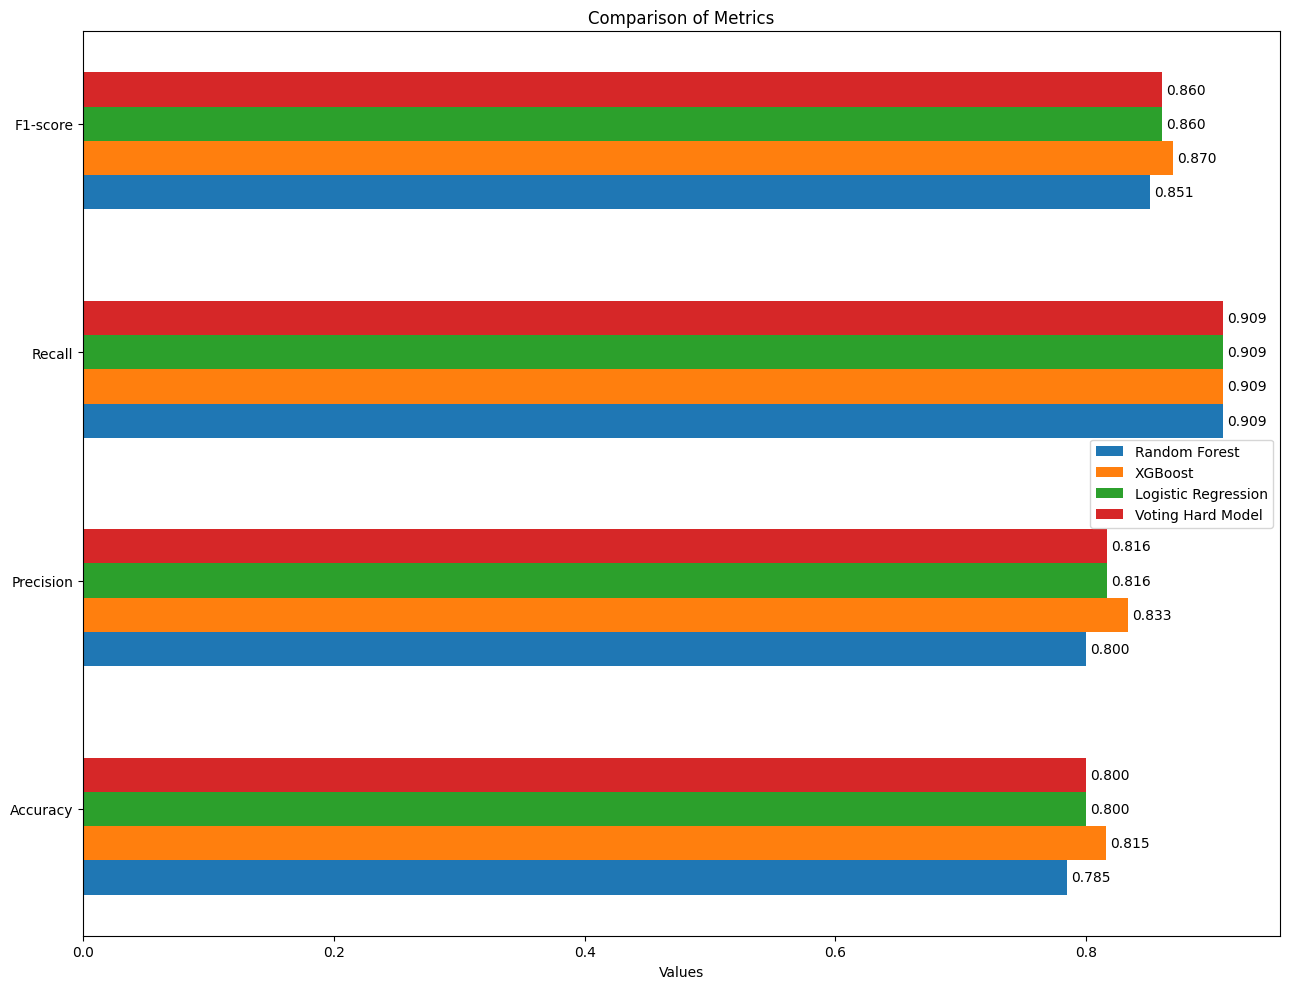

In [227]:
plot_metrics([rf_metrics, xg_metrics, lr_metrics, voting_metrics], labels=['Random Forest', 'XGBoost', 'Logistic Regression', 'Voting Hard Model'])